# Introduction
Voter Analysis exploration

## Imports
Import libraries and write settings here.

In [7]:
from fastai.tabular import *
from fastai import *

# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 60
pd.options.display.max_rows = 60

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

import seaborn as sns

#reproducability
np.random.seed(0)

# DETERMINE IF YOU ARE USING RAW OR SCALED
Scaled is Zhao's data, continuous variables divided by standard deviation
<br>Raw is unscaled raw data

In [8]:
useRaw=False
dropCorrelatedColumns=True  #dropping correlated columns? The feeder columns
dropSummaryColumns=False    #if above true, choose to drop summary columns or the columns that make them up

# Data Import and Cleaning

In [9]:
#get the data
if (useRaw == True):
    df = pd.read_csv('./data/ccesplus.csv',encoding = "ISO-8859-1")
else:
    df = pd.read_csv('./data/ccesplus_fscaled.csv',encoding = "ISO-8859-1")

In [10]:
#get rid of spaces and caps in column names (if any)
df.columns = [col.replace(' ','_') for col in df.columns]

In [11]:
# df.head()
# df.columns
# df.describe()

#any duplicate rows?
df.duplicated().sum()

0

In [12]:
#lets see how many columns, how many have no and some missing values
print (f"Total columns={len(df.columns)}")
print(f"Total columns with no Nans= {len(df.columns[~df.isnull().any()])}") 
print(f"Total columns with Nans= {len(df.columns[df.isnull().any()])}") #add ~ to get columns with no missing values

Total columns=866
Total columns with no Nans= 268
Total columns with Nans= 598


The columns with no NaNs (missing values) are the easiest to use since we dont have to impute missing values

## Get a subset of the rows of the data to work on if desired

In [7]:
#get first thousand rows
# df=df[:1000]
df.head()

,cc.countyfips,cc.V101,cc.commonweight_vv,cc.commonweight_vv_post,cc.commonweight_vv_lgbt,cc.commonweight,cc.commonweight_post,cc.tookpost,cc.lookupzip,cc.inputstate,cc.cdid113,cc.cdid115,cc.countyname,cc.CurrentGovName,cc.CurrentGovParty,cc.CurrentHouseGender,cc.CurrentHouseName,cc.CurrentHouseParty,cc.CurrentSen1Gender,cc.CurrentSen1Name,cc.CurrentSen1Party,cc.CurrentSen2Gender,cc.CurrentSen2Name,cc.CurrentSen2Party,cc.GovCand1Incumbent,cc.GovCand1Name,cc.GovCand1Party,cc.GovCand2Incumbent,cc.GovCand2Name,cc.GovCand2Party,...,dr.marg.2012,dr.pmarg.2012,dr.ratio.2016,dr.marg.2016,dr.pmarg.2016,pmarg.dif12,pmarg.dif8,marg.dif12,marg.dif8,ratio.dif12,ratio.dif8,RepClosedP,RepPMarch15,TrumpCarson,TrumpKasich,TrumpCruz,TrumpStrength,relig.tot.pc,relig.evan.pc,relig.cath.pc,relig.orth.pc,relig.oth.pc,relig.lds.pc,relig.mslm.pc,relig.ojud.pc,relig.majprt.pc,relig.majchr.pc,relig.bud.pc,relig.hind.pc,demo.popdense
0,NaN,0.990165,0.490168,0.358252,0.415116,0.392297,0.313699,1,1.710309,1.270698,0.293357,0.293375,,Kate Brown,Democratic,M,Peter DeFazio,Democratic,M,Ron Wyden,Democratic,M,Jeff Merkley,Democratic,1,Kate Brown,Democratic,0,Bud Pierce,Republican,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.993253,0.567879,0.470839,0.524566,0.544645,0.516661,1,1.702097,1.270698,0.073339,0.073344,,Kate Brown,Democratic,F,Suzanne Bonamici,Democratic,M,Ron Wyden,Democratic,M,Jeff Merkley,Democratic,1,Kate Brown,Democratic,0,Bud Pierce,Republican,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,0.996015,4.925791,NaN,NaN,8.213954,0.000000,0,1.504748,0.123970,0.146678,0.146687,,Doug Ducey,Republican,F,Martha McSally,Republican,M,John McCain,Republican,M,Jeff Flake,Republican,0,,,0,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,0.996495,0.758395,NaN,0.465872,0.494493,0.000000,0,1.476199,1.518639,0.293357,0.293375,,Gary Herbert,Republican,F,Mia Love,Republican,M,Orrin Hatch,Republican,M,Mike Lee,Republican,0,Mike Weinholtz,Democratic,1,Gary R. Herbert,Republican,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.996763,0.531301,0.385797,0.445813,0.482130,0.396884,1,1.714380,1.270698,0.146678,0.146687,,Kate Brown,Democratic,M,Greg Walden,Republican,M,Ron Wyden,Democratic,M,Jeff Merkley,Democratic,1,Kate Brown,Democratic,0,Bud Pierce,Republican,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cols = list(df.columns)
import fnmatch
pattern='cc.CC16_422*'
matching = fnmatch.filter(cols, pattern)
matching

cols_all=['cc.CC16_422c','cc.CC16_422d','cc.CC16_422e','cc.CC16_422eRev','cc.CC16_422f','cc.CC16_422fRev', 'cc.raceviewsum','cc.immviewsum']


tmp_df=df[cols_all].copy()
tmp_df['summ']= (tmp_df['cc.CC16_422c']+ tmp_df['cc.CC16_422d']+tmp_df['cc.CC16_422eRev']+tmp_df['cc.CC16_422fRev'] 
                +tmp_df['cc.CC16_422e']+tmp_df['cc.CC16_422f'])/6

tmp_df.head()

['cc.CC16_422c',
 'cc.CC16_422d',
 'cc.CC16_422e',
 'cc.CC16_422eRev',
 'cc.CC16_422f',
 'cc.CC16_422fRev']

,cc.CC16_422c,cc.CC16_422d,cc.CC16_422e,cc.CC16_422eRev,cc.CC16_422f,cc.CC16_422fRev,cc.raceviewsum,cc.immviewsum,summ
0,0.517074,0.659101,0.81802,0.81802,0.772133,0.772133,0.74893,0.425285,0.726080
1,0.517074,0.988651,0.40901,0.40901,0.772133,0.772133,0.74893,0.850569,0.644668
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.850569,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.275854,NaN
4,0.517074,0.329550,0.40901,0.40901,0.386066,0.386066,0.42796,0.000000,0.406129


## Get the columns of interest

In [9]:
all = pd.read_excel('./data/CCESplusVariables.xlsx',encoding = "ISO-8859-1")

# for every regid=3.1 get the third column (variable name) convert to a list
columns = list(all[all['regid']==3.1].iloc[:,2])

# #get the dependant variable(s)
# # columns_dep_var= ['cc.TrumpGEVote','cc.TrumpPVote', 'cc.vote12.gop']
columns_dep_var= 'cc.vote16'

# #combine
# columns.extend(columns_dep_var)

# #strip rubbish
columns = [col.replace(' ','_') for col in columns]

## Create dataframe for model training

In [10]:
columns

['cc.vote16',
 'cc.emp.nojob',
 'cc.CC16_304',
 'cc.faminc',
 'crashpc',
 'rustpc',
 'job.uer',
 'econ.mhi',
 'econ.hhpov.p',
 'taa.wrks.disc95.pcpy',
 'cc.CC16_305_3',
 'cc.CC16_305_2',
 'cc.CC16_305_1',
 'cc.CC16_305_7',
 'cc.CC16_305_5',
 'cc.CC16_305_11',
 'cc.CC16_305_6',
 'cc.CC16_305_9',
 'cc.CC16_305_10',
 'cc.CC16_305_4',
 'cc.fortunesum',
 'mort.ucd.despair.disc95.pdpy',
 'cc.CC16_331_2',
 'cc.CC16_331_3',
 'cc.CC16_331_7',
 'cc.CC16_331_1',
 'cc.immviewsum',
 'cc.CC16_422c',
 'cc.CC16_422d',
 'cc.CC16_422e',
 'cc.CC16_422f',
 'cc.raceviewsum',
 'cc.CC16_307',
 'cc.CC16_351B',
 'cc.Age',
 'cc.Sex',
 'cc.BlackDum',
 'cc.WhiteDum',
 'cc.maxeduc.4yr',
 'cc.citylength_1',
 'cc.isimmigrant',
 'cc.child18',
 'cc.milstat_1',
 'cc.milstat_3',
 'cc.union',
 'cc.CC16_300_5',
 'cc.newsint',
 'cc.Ideo7',
 'cc.EvanProt',
 'cc.Catholic',
 'cc.Religiosity',
 'eth.his.p',
 'relig.evan.pc',
 'demo.popdense',
 'cc.RepDum',
 'cc.IndDum']

In [4]:
#select out the columns of interest
df_s=df[columns].copy()

NameError: name 'columns' is not defined

In [12]:
len(df_s.iloc[0])

56

### Output some info

In [13]:
# how many unique values there are per column, 
# use that to guide which columns are categorical and which are continuous
#pick largest value that looks continuous, for instance raceviewsum=17 
#(but see the docs many of theses fields are floats which meand fastai ignores cardinality)
for col in df_s.columns:
    print(f"{col}:{df[col].nunique()}")

cc.vote16:7
cc.emp.nojob:2
cc.CC16_304:5
cc.faminc:16
crashpc:2626
rustpc:2437
job.uer:770
econ.mhi:2646
econ.hhpov.p:1040
taa.wrks.disc95.pcpy:2120
cc.CC16_305_3:2
cc.CC16_305_2:2
cc.CC16_305_1:2
cc.CC16_305_7:2
cc.CC16_305_5:2
cc.CC16_305_11:2
cc.CC16_305_6:2
cc.CC16_305_9:2
cc.CC16_305_10:2
cc.CC16_305_4:2
cc.fortunesum:10
mort.ucd.despair.disc95.pdpy:2660
cc.CC16_331_2:2
cc.CC16_331_3:2
cc.CC16_331_7:2
cc.CC16_331_1:2
cc.immviewsum:5
cc.CC16_422c:5
cc.CC16_422d:5
cc.CC16_422e:5
cc.CC16_422f:5
cc.raceviewsum:17
cc.CC16_307:4
cc.CC16_351B:2
cc.Age:80
cc.Sex:2
cc.BlackDum:2
cc.WhiteDum:2
cc.maxeduc.4yr:2
cc.citylength_1:94
cc.isimmigrant:2
cc.child18:2
cc.milstat_1:2
cc.milstat_3:2
cc.union:2
cc.CC16_300_5:2
cc.newsint:5
cc.Ideo7:7
cc.EvanProt:2
cc.Catholic:2
cc.Religiosity:15
eth.his.p:1030
relig.evan.pc:2665
demo.popdense:2668
cc.RepDum:2
cc.IndDum:2


In [14]:
#what types are the columns
df_s.dtypes

cc.vote16                       float64
cc.emp.nojob                      int64
cc.CC16_304                     float64
cc.faminc                       float64
crashpc                         float64
rustpc                          float64
job.uer                         float64
econ.mhi                        float64
econ.hhpov.p                    float64
taa.wrks.disc95.pcpy            float64
cc.CC16_305_3                     int64
cc.CC16_305_2                     int64
cc.CC16_305_1                     int64
cc.CC16_305_7                     int64
cc.CC16_305_5                     int64
cc.CC16_305_11                    int64
cc.CC16_305_6                     int64
cc.CC16_305_9                     int64
cc.CC16_305_10                    int64
cc.CC16_305_4                     int64
cc.fortunesum                   float64
mort.ucd.despair.disc95.pdpy    float64
cc.CC16_331_2                     int64
cc.CC16_331_3                     int64
cc.CC16_331_7                     int64


In [15]:
#the percentage of NaNs in each column, note the large percentage of missing values in the bottom columns
#I would guess that cc.faminc and cc.raceviewsum are critical
df_s.isna().sum().sort_values(ascending = True)/len(df)

cc.CC16_331_3                   0.000000
cc.CC16_305_4                   0.000000
cc.fortunesum                   0.000000
cc.milstat_1                    0.000000
cc.CC16_331_2                   0.000000
cc.CC16_331_7                   0.000000
cc.CC16_331_1                   0.000000
cc.CC16_305_10                  0.000000
cc.immviewsum                   0.000000
cc.Age                          0.000000
cc.Sex                          0.000000
cc.BlackDum                     0.000000
cc.WhiteDum                     0.000000
cc.maxeduc.4yr                  0.000000
cc.isimmigrant                  0.000000
cc.CC16_300_5                   0.000000
cc.CC16_305_9                   0.000000
cc.milstat_3                    0.000000
cc.CC16_305_11                  0.000000
cc.CC16_305_5                   0.000000
cc.CC16_305_7                   0.000000
cc.CC16_305_1                   0.000000
cc.CC16_305_2                   0.000000
cc.CC16_305_3                   0.000000
cc.emp.nojob    

## Remove NaN dependent variable rows
whaddaya going to do?  You have no way of knowing how these people voted

In [16]:
print(f"There are {len(df_s)} rows in df_s")

There are 64600 rows in df_s


In [17]:
# pull out the nulls from the column of interest
dfnull = df_s.loc[pd.isnull(df_s['cc.vote16'])]
print(f"{len(dfnull)} NAN rows removed")

280 NAN rows removed


In [18]:
#dump the NaN rows
df_s = df_s[pd.notnull(df_s['cc.vote16'] )]
print(f"There are {len(df_s)} rows in df_s after removing rows with Nan for dependant variable")

There are 64320 rows in df_s after removing rows with Nan for dependant variable


In [19]:
df_s.head()

,cc.vote16,cc.emp.nojob,cc.CC16_304,cc.faminc,crashpc,rustpc,job.uer,econ.mhi,econ.hhpov.p,taa.wrks.disc95.pcpy,cc.CC16_305_3,cc.CC16_305_2,cc.CC16_305_1,cc.CC16_305_7,cc.CC16_305_5,cc.CC16_305_11,cc.CC16_305_6,cc.CC16_305_9,cc.CC16_305_10,cc.CC16_305_4,cc.fortunesum,mort.ucd.despair.disc95.pdpy,cc.CC16_331_2,cc.CC16_331_3,cc.CC16_331_7,cc.CC16_331_1,cc.immviewsum,cc.CC16_422c,cc.CC16_422d,cc.CC16_422e,cc.CC16_422f,cc.raceviewsum,cc.CC16_307,cc.CC16_351B,cc.Age,cc.Sex,cc.BlackDum,cc.WhiteDum,cc.maxeduc.4yr,cc.citylength_1,cc.isimmigrant,cc.child18,cc.milstat_1,cc.milstat_3,cc.union,cc.CC16_300_5,cc.newsint,cc.Ideo7,cc.EvanProt,cc.Catholic,cc.Religiosity,eth.his.p,relig.evan.pc,demo.popdense,cc.RepDum,cc.IndDum
0,1.776907,0,0.947973,1.405461,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0.000000,NaN,0,0,0,1,0.425285,0.517074,0.659101,0.81802,0.772133,0.74893,1.183436,0.0,1.123082,1,0,1,0,NaN,0,0.0,1.004098,1.047055,0.0,1,0.863162,1.353232,0.0,0.0,1.448094,NaN,NaN,NaN,1.0,0.0
1,0.592302,0,0.947973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,1,0,0.000000,NaN,1,0,0,1,0.850569,0.517074,0.988651,0.40901,0.772133,0.74893,1.183436,1.0,1.261005,1,0,1,1,1.598433,0,0.0,1.004098,1.047055,1.0,0,0.431581,1.578771,1.0,0.0,1.448094,NaN,NaN,NaN,1.0,0.0
2,0.000000,1,1.263963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0.000000,NaN,0,1,0,1,0.850569,NaN,NaN,NaN,NaN,NaN,0.887577,1.0,0.472877,0,0,0,0,0.310806,0,0.0,1.004098,1.047055,0.0,0,0.863162,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,0,0.947973,0.140546,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,1,0,0,-0.869897,NaN,1,1,0,1,1.275854,NaN,NaN,NaN,NaN,NaN,0.887577,0.0,0.512283,0,1,0,0,0.088802,1,1.0,1.004098,1.047055,NaN,0,0.431581,1.127693,0.0,0.0,1.267082,NaN,NaN,NaN,1.0,0.0
4,1.184605,0,0.315991,1.124369,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0.869897,NaN,0,0,0,0,0.000000,0.517074,0.329550,0.40901,0.386066,0.42796,1.183436,0.0,1.477740,0,0,1,1,0.666014,0,0.0,1.004098,1.047055,0.0,0,0.431581,0.225539,0.0,0.0,0.995565,NaN,NaN,NaN,0.0,0.0


## Convert cc.vote16 back to categorical

In [20]:
#how many unique values?
unique_vals = df_s['cc.vote16'].unique()
unique_vals

array([1.776907, 0.592302, 0.      , 1.184605, 2.961511, 2.369209, 3.553814])

In [21]:
if (useRaw == True):
    mult=1.0
else:
    #cc.vote16 seems to have been scaled incorrectly, it should be categorical, convert it back
    #1/std_dev = .592302
    mult = 1/0.592302

#multiply col by mult to get close to original value
df_s['cc.vote16'] = (df_s['cc.vote16']*mult).astype('int64')

# unique_vals_unnormalized = unique_vals*std_dev
# unique_vals_unnormalized
# unique_vals_unnormalized = unique_vals_unnormalized.astype('int64')
# unique_vals_unnormalized

In [22]:
#causes nan for learner
# df_s['cc.trumpgevote'] = df_s['cc.trumpgevote'].astype('category');
# df_s['cc.trumpgevote'].cat.categories

In [23]:
#is the dataset balanced?
df_vc= df_s['cc.vote16'].value_counts()
df_vc
df_vc.sum()
df_vc[0]

2    22136
0    19389
1    18754
3     1829
6     1136
4      913
5      163
Name: cc.vote16, dtype: int64

64320

19389

In [24]:
#how about as percentages
print(f"total percentage of people who voted for trump in this dataset={100*df_vc[2]/df_vc.sum()}")
print(f"total percentage of people who voted for trump excluding non voters={100*df_vc[1]/(df_vc.sum()-df_vc[0])}")
print(f"total percentage of people who voted for Hillary excluding non voters={100*df_vc[2]/(df_vc.sum()-df_vc[0])}")

total percentage of people who voted for trump in this dataset=34.41542288557214
total percentage of people who voted for trump excluding non voters=41.73955620840845
total percentage of people who voted for Hillary excluding non voters=49.26665331285749


# Check on correlations


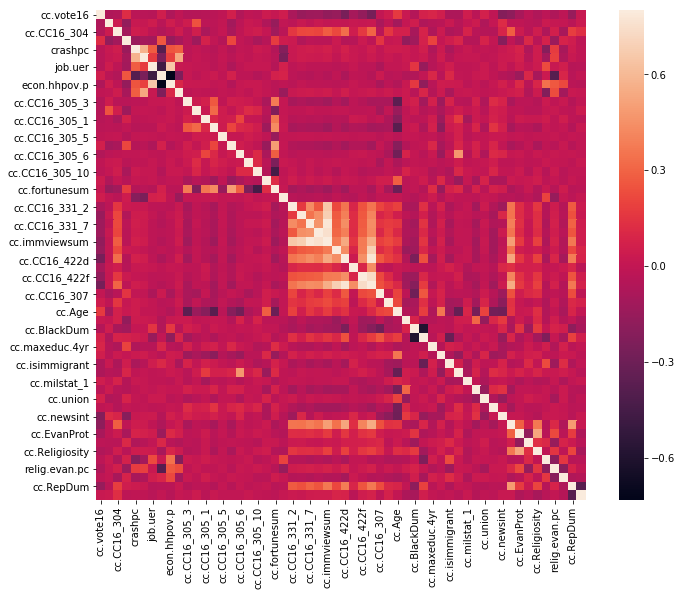

In [25]:
#correlation matrix
corrmat = df_s.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#there is a lot of correlation here,the darks and the lights

In [26]:
#lets get top correlated columns
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=None):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    if (n is None):
        n=len(df.columns)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df_s))


Top Absolute Correlations
cc.CC16_331_7   cc.immviewsum           0.780721
cc.CC16_422d    cc.raceviewsum          0.772481
cc.CC16_331_1   cc.immviewsum           0.754479
cc.CC16_422f    cc.raceviewsum          0.736505
econ.mhi        econ.hhpov.p            0.730862
cc.CC16_331_3   cc.immviewsum           0.684166
cc.CC16_422c    cc.raceviewsum          0.682102
job.uer         econ.hhpov.p            0.651577
cc.CC16_331_2   cc.immviewsum           0.651303
cc.BlackDum     cc.WhiteDum             0.595172
crashpc         rustpc                  0.577588
cc.immviewsum   cc.raceviewsum          0.557516
cc.raceviewsum  cc.Ideo7                0.547859
cc.immviewsum   cc.CC16_422d            0.541188
rustpc          taa.wrks.disc95.pcpy    0.532829
cc.CC16_422d    cc.Ideo7                0.526753
cc.EvanProt     cc.Religiosity          0.526236
cc.immviewsum   cc.Ideo7                0.500594
cc.CC16_305_11  cc.fortunesum           0.491183
cc.Ideo7        cc.RepDum               0.4

## Correlations above 50% are worrisome, especially when its a summary variable that adds up a bunch of other variables. Lets get rid of them

In [27]:
#dump columns that summaries are made of 
if (dropCorrelatedColumns ==True): #dropping correlated columns?
    if (dropSummaryColumns == True):
        summary_cols=[ 'cc.raceviewsum','cc.immviewsum']
    else:
        summary_cols=[ 'cc.CC16_331_7','cc.CC16_331_1', 'cc.CC16_331_3', 'cc.CC16_331_2', 'cc.CC16_422d','cc.CC16_422f','cc.CC16_422c','cc.CC16_422e']

    df_s.drop(summary_cols,axis=1,inplace=True)

## Split out categorical and continuous variables
see if fastai can auto do it

In [28]:
# #give fastai a shot at splitting cat and cont variables
res_cont, res_cat = cont_cat_split(df_s,max_card=18)

In [29]:
# ??cont_cat_split
print(res_cont)
print(res_cat)

['cc.CC16_304', 'cc.faminc', 'crashpc', 'rustpc', 'job.uer', 'econ.mhi', 'econ.hhpov.p', 'taa.wrks.disc95.pcpy', 'cc.fortunesum', 'mort.ucd.despair.disc95.pdpy', 'cc.immviewsum', 'cc.raceviewsum', 'cc.CC16_307', 'cc.CC16_351B', 'cc.Age', 'cc.citylength_1', 'cc.child18', 'cc.milstat_1', 'cc.milstat_3', 'cc.union', 'cc.newsint', 'cc.Ideo7', 'cc.EvanProt', 'cc.Catholic', 'cc.Religiosity', 'eth.his.p', 'relig.evan.pc', 'demo.popdense', 'cc.RepDum', 'cc.IndDum']
['cc.vote16', 'cc.emp.nojob', 'cc.CC16_305_3', 'cc.CC16_305_2', 'cc.CC16_305_1', 'cc.CC16_305_7', 'cc.CC16_305_5', 'cc.CC16_305_11', 'cc.CC16_305_6', 'cc.CC16_305_9', 'cc.CC16_305_10', 'cc.CC16_305_4', 'cc.Sex', 'cc.BlackDum', 'cc.WhiteDum', 'cc.maxeduc.4yr', 'cc.isimmigrant', 'cc.CC16_300_5']


In [31]:
#remove the dependant variable
res_cont = [x for x in res_cont if x not in columns_dep_var]
res_cat = [x for x in res_cat if x not in columns_dep_var]

In [32]:
df_s.head()
len(df_s)

,cc.vote16,cc.emp.nojob,cc.CC16_304,cc.faminc,crashpc,rustpc,job.uer,econ.mhi,econ.hhpov.p,taa.wrks.disc95.pcpy,cc.CC16_305_3,cc.CC16_305_2,cc.CC16_305_1,cc.CC16_305_7,cc.CC16_305_5,cc.CC16_305_11,cc.CC16_305_6,cc.CC16_305_9,cc.CC16_305_10,cc.CC16_305_4,cc.fortunesum,mort.ucd.despair.disc95.pdpy,cc.immviewsum,cc.raceviewsum,cc.CC16_307,cc.CC16_351B,cc.Age,cc.Sex,cc.BlackDum,cc.WhiteDum,cc.maxeduc.4yr,cc.citylength_1,cc.isimmigrant,cc.child18,cc.milstat_1,cc.milstat_3,cc.union,cc.CC16_300_5,cc.newsint,cc.Ideo7,cc.EvanProt,cc.Catholic,cc.Religiosity,eth.his.p,relig.evan.pc,demo.popdense,cc.RepDum,cc.IndDum
0,3,0,0.947973,1.405461,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0.000000,NaN,0.425285,0.74893,1.183436,0.0,1.123082,1,0,1,0,NaN,0,0.0,1.004098,1.047055,0.0,1,0.863162,1.353232,0.0,0.0,1.448094,NaN,NaN,NaN,1.0,0.0
1,1,0,0.947973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0,0,1,0,0.000000,NaN,0.850569,0.74893,1.183436,1.0,1.261005,1,0,1,1,1.598433,0,0.0,1.004098,1.047055,1.0,0,0.431581,1.578771,1.0,0.0,1.448094,NaN,NaN,NaN,1.0,0.0
2,0,1,1.263963,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0.000000,NaN,0.850569,NaN,0.887577,1.0,0.472877,0,0,0,0,0.310806,0,0.0,1.004098,1.047055,0.0,0,0.863162,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,0,0.947973,0.140546,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,0,0,1,1,0,0,-0.869897,NaN,1.275854,NaN,0.887577,0.0,0.512283,0,1,0,0,0.088802,1,1.0,1.004098,1.047055,NaN,0,0.431581,1.127693,0.0,0.0,1.267082,NaN,NaN,NaN,1.0,0.0
4,2,0,0.315991,1.124369,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0,0,0,0,0.869897,NaN,0.000000,0.42796,1.183436,0.0,1.477740,0,0,1,1,0.666014,0,0.0,1.004098,1.047055,0.0,0,0.431581,0.225539,0.0,0.0,0.995565,NaN,NaN,NaN,0.0,0.0


64320

In [33]:
df_s.columns

Index(['cc.vote16', 'cc.emp.nojob', 'cc.CC16_304', 'cc.faminc', 'crashpc',
       'rustpc', 'job.uer', 'econ.mhi', 'econ.hhpov.p', 'taa.wrks.disc95.pcpy',
       'cc.CC16_305_3', 'cc.CC16_305_2', 'cc.CC16_305_1', 'cc.CC16_305_7',
       'cc.CC16_305_5', 'cc.CC16_305_11', 'cc.CC16_305_6', 'cc.CC16_305_9',
       'cc.CC16_305_10', 'cc.CC16_305_4', 'cc.fortunesum',
       'mort.ucd.despair.disc95.pdpy', 'cc.immviewsum', 'cc.raceviewsum',
       'cc.CC16_307', 'cc.CC16_351B', 'cc.Age', 'cc.Sex', 'cc.BlackDum',
       'cc.WhiteDum', 'cc.maxeduc.4yr', 'cc.citylength_1', 'cc.isimmigrant',
       'cc.child18', 'cc.milstat_1', 'cc.milstat_3', 'cc.union',
       'cc.CC16_300_5', 'cc.newsint', 'cc.Ideo7', 'cc.EvanProt', 'cc.Catholic',
       'cc.Religiosity', 'eth.his.p', 'relig.evan.pc', 'demo.popdense',
       'cc.RepDum', 'cc.IndDum'],
      dtype='object')

# Split out train/test sets for consistency
Neural Nets, Random Forest, etc will use same sets, so result differnces cannot be attributed to different splits

In [34]:
# split out train/test sets
from sklearn.model_selection import train_test_split
train=tst=None
train,tst = train_test_split(df_s, test_size=0.1)
print(str(len(train)))
print(str(len(tst)))

57888
6432


In [35]:
train.head()

,cc.vote16,cc.emp.nojob,cc.CC16_304,cc.faminc,crashpc,rustpc,job.uer,econ.mhi,econ.hhpov.p,taa.wrks.disc95.pcpy,cc.CC16_305_3,cc.CC16_305_2,cc.CC16_305_1,cc.CC16_305_7,cc.CC16_305_5,cc.CC16_305_11,cc.CC16_305_6,cc.CC16_305_9,cc.CC16_305_10,cc.CC16_305_4,cc.fortunesum,mort.ucd.despair.disc95.pdpy,cc.immviewsum,cc.raceviewsum,cc.CC16_307,cc.CC16_351B,cc.Age,cc.Sex,cc.BlackDum,cc.WhiteDum,cc.maxeduc.4yr,cc.citylength_1,cc.isimmigrant,cc.child18,cc.milstat_1,cc.milstat_3,cc.union,cc.CC16_300_5,cc.newsint,cc.Ideo7,cc.EvanProt,cc.Catholic,cc.Religiosity,eth.his.p,relig.evan.pc,demo.popdense,cc.RepDum,cc.IndDum
41774,2,0,0.631982,0.421638,1.555567,2.997609,0.955437,0.746187,1.124623,2.365855,0,0,0,1,0,1,0,0,0,0,1.739794,0.722408,0.850569,0.855920,0.887577,0.0,0.709315,1,1,0,0,0.044401,1,1.0,1.004098,1.047055,0.0,1,0.431581,0.902155,0.0,0.0,0.814553,0.525258,1.139161,0.042193,0.0,0.0
7379,0,1,0.947973,0.983823,0.486994,0.283530,0.997454,1.108232,0.867162,0.277401,0,0,0,0,0,0,0,0,0,1,0.869897,1.172766,0.425285,NaN,0.295859,NaN,0.886644,0,0,1,0,0.888018,1,0.0,0.502049,1.047055,0.0,0,3.021067,1.578771,1.0,0.0,0.995565,1.488613,0.506771,0.087779,1.0,0.0
31139,2,0,0.631982,0.843277,0.728483,0.645397,0.747177,1.121927,0.686091,0.753709,0,0,0,0,0,0,0,0,0,1,0.869897,1.034503,0.425285,0.855920,1.183436,0.0,1.458036,0,0,1,1,2.131244,0,0.0,1.004098,1.047055,0.0,0,0.431581,0.676616,0.0,1.0,1.357588,0.308885,0.729800,0.248592,0.0,0.0
10588,1,0,0.947973,0.843277,0.673498,1.074265,1.063220,1.072834,0.775212,0.580976,0,0,0,0,0,0,0,0,1,0,-0.869897,0.905313,1.701138,1.069900,1.183436,1.0,1.458036,1,0,1,0,1.598433,0,0.0,1.004098,1.047055,1.0,0,1.294743,1.578771,1.0,0.0,1.448094,0.721752,0.201437,0.166523,1.0,0.0
23391,1,0,1.263963,0.562184,1.321577,0.276227,0.639394,0.887516,0.773797,0.098916,0,0,0,0,0,0,0,0,1,0,-0.869897,0.747420,1.701138,1.283881,1.183436,1.0,1.182192,0,0,1,0,1.376428,0,0.0,1.004098,0.523528,0.0,1,0.431581,1.578771,1.0,0.0,0.905059,0.310414,0.633215,0.011432,0.0,1.0


#  Save train/test and catagorical and continuous column names

In [36]:
os.makedirs('tmp', exist_ok=True)

trnfile = 'tmp/trn_regid31'
tstfile = 'tmp/tst_regid31'
nullfile = 'tmp/null_regid31'
jsonfile = 'tmp/catcont_regid31.json'

if (useRaw == True):
    trnfile = 'tmp/trn_regid31_raw'
    tstfile = 'tmp/tst_regid31_raw'
    nullfile = 'tmp/null_regid31'
    jsonfile = 'tmp/catcont_regid31_raw.json'
    
train.reset_index(inplace=True)
train.to_feather(trnfile)

tst.reset_index(inplace=True)
tst.to_feather(tstfile)

dfnull.reset_index(inplace=True)
dfnull.to_feather(nullfile)

In [37]:
train.head()

,index,cc.vote16,cc.emp.nojob,cc.CC16_304,cc.faminc,crashpc,rustpc,job.uer,econ.mhi,econ.hhpov.p,taa.wrks.disc95.pcpy,cc.CC16_305_3,cc.CC16_305_2,cc.CC16_305_1,cc.CC16_305_7,cc.CC16_305_5,cc.CC16_305_11,cc.CC16_305_6,cc.CC16_305_9,cc.CC16_305_10,cc.CC16_305_4,cc.fortunesum,mort.ucd.despair.disc95.pdpy,cc.immviewsum,cc.raceviewsum,cc.CC16_307,cc.CC16_351B,cc.Age,cc.Sex,cc.BlackDum,cc.WhiteDum,cc.maxeduc.4yr,cc.citylength_1,cc.isimmigrant,cc.child18,cc.milstat_1,cc.milstat_3,cc.union,cc.CC16_300_5,cc.newsint,cc.Ideo7,cc.EvanProt,cc.Catholic,cc.Religiosity,eth.his.p,relig.evan.pc,demo.popdense,cc.RepDum,cc.IndDum
0,41774,2,0,0.631982,0.421638,1.555567,2.997609,0.955437,0.746187,1.124623,2.365855,0,0,0,1,0,1,0,0,0,0,1.739794,0.722408,0.850569,0.855920,0.887577,0.0,0.709315,1,1,0,0,0.044401,1,1.0,1.004098,1.047055,0.0,1,0.431581,0.902155,0.0,0.0,0.814553,0.525258,1.139161,0.042193,0.0,0.0
1,7379,0,1,0.947973,0.983823,0.486994,0.283530,0.997454,1.108232,0.867162,0.277401,0,0,0,0,0,0,0,0,0,1,0.869897,1.172766,0.425285,NaN,0.295859,NaN,0.886644,0,0,1,0,0.888018,1,0.0,0.502049,1.047055,0.0,0,3.021067,1.578771,1.0,0.0,0.995565,1.488613,0.506771,0.087779,1.0,0.0
2,31139,2,0,0.631982,0.843277,0.728483,0.645397,0.747177,1.121927,0.686091,0.753709,0,0,0,0,0,0,0,0,0,1,0.869897,1.034503,0.425285,0.855920,1.183436,0.0,1.458036,0,0,1,1,2.131244,0,0.0,1.004098,1.047055,0.0,0,0.431581,0.676616,0.0,1.0,1.357588,0.308885,0.729800,0.248592,0.0,0.0
3,10588,1,0,0.947973,0.843277,0.673498,1.074265,1.063220,1.072834,0.775212,0.580976,0,0,0,0,0,0,0,0,1,0,-0.869897,0.905313,1.701138,1.069900,1.183436,1.0,1.458036,1,0,1,0,1.598433,0,0.0,1.004098,1.047055,1.0,0,1.294743,1.578771,1.0,0.0,1.448094,0.721752,0.201437,0.166523,1.0,0.0
4,23391,1,0,1.263963,0.562184,1.321577,0.276227,0.639394,0.887516,0.773797,0.098916,0,0,0,0,0,0,0,0,1,0,-0.869897,0.747420,1.701138,1.283881,1.183436,1.0,1.182192,0,0,1,0,1.376428,0,0.0,1.004098,0.523528,0.0,1,0.431581,1.578771,1.0,0.0,0.905059,0.310414,0.633215,0.011432,0.0,1.0


In [38]:
tst.head()

,index,cc.vote16,cc.emp.nojob,cc.CC16_304,cc.faminc,crashpc,rustpc,job.uer,econ.mhi,econ.hhpov.p,taa.wrks.disc95.pcpy,cc.CC16_305_3,cc.CC16_305_2,cc.CC16_305_1,cc.CC16_305_7,cc.CC16_305_5,cc.CC16_305_11,cc.CC16_305_6,cc.CC16_305_9,cc.CC16_305_10,cc.CC16_305_4,cc.fortunesum,mort.ucd.despair.disc95.pdpy,cc.immviewsum,cc.raceviewsum,cc.CC16_307,cc.CC16_351B,cc.Age,cc.Sex,cc.BlackDum,cc.WhiteDum,cc.maxeduc.4yr,cc.citylength_1,cc.isimmigrant,cc.child18,cc.milstat_1,cc.milstat_3,cc.union,cc.CC16_300_5,cc.newsint,cc.Ideo7,cc.EvanProt,cc.Catholic,cc.Religiosity,eth.his.p,relig.evan.pc,demo.popdense,cc.RepDum,cc.IndDum
0,61820,0,0,0.631982,0.562184,0.491484,0.921370,0.747177,1.268452,0.591311,0.714095,1,0,0,0,0,0,0,0,0,0,0.869897,1.250706,0.000000,NaN,0.887577,0.0,0.453173,1,0,1,1,1.021221,0,0.0,1.004098,1.047055,0.0,1,3.021067,1.127693,1.0,0.0,1.538600,0.414396,0.549482,0.110087,0.0,1.0
1,62831,0,0,0.947973,0.702731,1.748649,2.739953,0.982839,0.623374,0.862918,0.000000,0,0,0,0,1,1,0,0,1,0,-0.869897,0.636006,0.850569,0.962910,0.887577,0.0,0.531986,1,0,1,0,0.044401,1,1.0,1.004098,1.047055,0.0,1,0.863162,NaN,0.0,0.0,0.995565,0.161324,1.368086,0.002795,0.0,1.0
2,28306,1,0,0.947973,0.983823,0.060405,0.017449,0.933515,1.305075,0.466825,0.143210,0,0,0,0,0,0,0,0,0,0,0.000000,1.026557,0.850569,1.283881,0.887577,0.0,1.162489,0,0,1,0,1.376428,0,0.0,1.004098,1.047055,1.0,1,0.431581,1.353232,0.0,1.0,1.176576,0.154443,0.137955,0.088558,0.0,1.0
3,14141,0,0,0.631982,1.546007,0.455221,0.519311,1.143601,0.751167,1.369353,0.377039,0,0,1,1,0,0,1,0,0,0,2.609691,0.619558,0.425285,NaN,0.887577,1.0,0.729018,1,0,0,1,0.355207,1,1.0,1.004098,1.047055,1.0,1,1.294743,0.451077,1.0,1.0,0.995565,2.990223,0.564938,0.158463,0.0,0.0
4,18323,2,0,0.631982,1.827100,0.477007,0.193115,0.993800,0.904360,1.110477,0.000000,0,0,0,0,0,0,0,0,1,1,0.000000,0.935057,0.000000,0.427960,0.887577,0.0,1.280708,0,0,1,0,0.133203,0,0.0,1.004098,0.523528,1.0,1,0.431581,0.451077,0.0,0.0,0.271518,0.546666,0.457018,0.005463,0.0,0.0


In [39]:
# (train['level_0']==train['index']).sum()/(len(train))

In [40]:
columns_dep_var
# columns_dep_var.split() #convert to a list

'cc.vote16'

In [41]:
import simplejson
with open(jsonfile,'w') as f:
    json.dump((res_cont,res_cat,columns_dep_var.split()), f)